In [ ]:
# import streamlit as st
# import pandas as pd
# import time
# import random
# import calendar
# from datetime import datetime, timedelta, date
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px


# # Optional change Mapbox map to plotly Map. https://plotly.com/python/scattermapbox/
# def generate_random_coordinates():
#     min_lat, max_lat = 52.392166, 52.639004
#     min_lon, max_lon = 13.215260, 13.770269
#     random_lat = random.uniform(min_lat, max_lat)
#     random_lon = random.uniform(min_lon, max_lon)
#     return random_lat, random_lon


# def generate_random_coordinates_list(num_samples=100):
#     lat_list = []
#     lon_list = []
#     for x in range(num_samples):
#         random_lat, random_lon = generate_random_coordinates()
#         lat_list.append(random_lat)
#         lon_list.append(random_lon)
#     return lat_list, lon_list


# public_stations = pd.read_csv("/home/yannik/ticket-control-bvg/data/datanew_map2.csv")
# data1 = pd.read_csv('/home/yannik/ticket-control-bvg/data/s_u_stations_fixed_with_keys_20230830.csv')


# # Page 1 landing page
# def page_1_landing_page():

#     lat_list, lon_list = generate_random_coordinates_list()
#     data = {"Location": ["Berlin"] * 100, "LAT": lat_list, "LON": lon_list}
#     berlin_df = pd.DataFrame(data)
#     datetimenow = time.strftime("%H:%M:%S")
#     st.title(f"Welcome to BVG Controllers BER 👋", )
#     st.map(data=public_stations, zoom=10, color="color", size=50)

#     #Select Stations
#     selected_options = st.multiselect("Select Station(s):", data1["station name"])
#     st.write("You selected:", selected_options)

#     # Add a refresh button
#     st.table(berlin_df)
#     output = st.empty()

#     while True:
#         current_time = time.strftime("%Y-%m-%d %H:%M:%S")
#         output.text(f"Last Update: {current_time}")
#         time.sleep(10)

# # Load your existing database into a DataFrame
# data = pd.read_csv('/home/yannik/ticket-control-bvg/data/preprocessed_database_telegram.csv')  # Replace with the path to your database file
# # Notice the .copy() to copy the values
# df = data.copy()
# df['date'] = pd.to_datetime(df['date'])

# # Page 2: Control Statistics
# def page_2_control_statistics():

#     # Streamlit app
#     st.title("Control Statistics")

#     # description
#     min_date = df['date'].iloc[0]

#     max_date = df['date'].iloc[-1]

#     user_date_ranges = st.date_input('Enter a range of two dates or leave default',
#                   (min_date, max_date),
#                   min_value=min_date, max_value=max_date)

#     # year_start, year_end = int(year_start), int(year_end)
#     # month_start, month_end = int(month_start), int(month_end)
#     # weekday_start, weekday_end = int(weekday_start), int(weekday_end)

#     # # Filter the DataFrame based on user selections
#     # df['year'] = pd.DatetimeIndex(df['date']).year
#     # df['month'] = pd.DatetimeIndex(df['date']).month
#     # df['day'] = pd.DatetimeIndex(df['date']).day

#     # filtered_data = df[
#     #     (df['date']>=datetime.date(year_start,month_start, weekday_start)) &
#     #     (df['date']<=datetime.date(year_end,month_end, weekday_end))
#     #     ]

#     # # Naming the weekdays
#     # weekdays = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
#     # # Applying the naming
#     # df["weekday"] = df["day"].map(weekdays)

#     # day_labels = df['weekday'].unique()
#     # day_sizes = df['day'].value_counts()

#     # # Create a bar chart from the filtered data
#     # range_fig, ax = plt.subplots()
#     # ax.bar(filtered_data['date'], filtered_data['station name'])
#     # plt.xlabel("Date")
#     # plt.ylabel("Counter")
#     # plt.title("Bar Chart Based on Selected Ranges")

#     # # Display the bar chart
#     # st.pyplot(range_fig)

#     # User input for number of top items to display
#     top_n_areas = st.selectbox("Select the number of areas to display:", [10, 25, 50])
#     top_n_stations = st.selectbox("Select the number of station names to display:", [10, 25, 50])
#     top_n_lines = st.selectbox("Select the number of lines to display:", [5, 10, 20])

#     # Arrange tables side by side
#     st.write("Control Statistics:")
#     col1, col2, col3 = st.columns(3)
#     with col1:
#         st.write(f"{top_n_areas} Most controlled areas:")
#         area_counts = df[(df["date"] >= pd.to_datetime(user_date_ranges[0])) & (df["date"] <= pd.to_datetime(user_date_ranges[1]))]['area'].value_counts()
#         st.write(area_counts.head(top_n_areas))

#     with col2:
#         st.write(f"{top_n_stations} Most controlled stations:")
#         station_counts = df[(df["date"] >= pd.to_datetime(user_date_ranges[0])) & (df["date"] <= pd.to_datetime(user_date_ranges[1]))]['station name'].value_counts()
#         st.write(station_counts.head(top_n_stations))

#     with col3:
#         st.write(f"{top_n_lines} Most controlled lines:")
#         lines_counts = df[(df["date"] >= pd.to_datetime(user_date_ranges[0])) & (df["date"] <= pd.to_datetime(user_date_ranges[1]))]['lines'].value_counts()
#         st.write(lines_counts.head(top_n_lines))


#     # Areas
#     st.title("Areas, stations & lines visualization")

#     # Calculate area frequencies using data ranges selected by user
#     area_counts = df[(df["date"] >= pd.to_datetime(user_date_ranges[0])) & (df["date"] <= pd.to_datetime(user_date_ranges[1]))]['area'].value_counts()

#     # Create a plotly map
#     fig1 = px.treemap(
#         names=area_counts.index,
#         parents=[''] * len(area_counts),
#         values=area_counts.values,
#         title="Area Visualization"
#     )

#     # Display the figure
#     st.plotly_chart(fig1)

#     # Calculate station frequencies
#     station_counts = df[(df["date"] >= pd.to_datetime(user_date_ranges[0])) & (df["date"] <= pd.to_datetime(user_date_ranges[1]))]['station name'].value_counts()
#     # Create a plotly map
#     fig2 = px.treemap(
#         names=station_counts.index,
#         parents=[''] * len(station_counts),
#         values=station_counts.values,
#         title="Station Visualization"
#     )

#     # Display the figure
#     st.plotly_chart(fig2)

#     # Calculate lines frequencies
#     lines_counts = df[(df["date"] >= pd.to_datetime(user_date_ranges[0])) & (df["date"] <= pd.to_datetime(user_date_ranges[1]))]['lines'].value_counts()
#     # Create a plotly mapp
#     fig3 = px.treemap(
#         names=lines_counts.index,
#         parents=[''] * len(lines_counts),
#         values=lines_counts.values,
#         title="Lines Visualization"
#     )

#     # Display the figure
#     st.plotly_chart(fig3)

#     # Pie charts for year, month, day:

#     st.title("Time visualization")

#     # df['year'] = pd.DatetimeIndex(df['date']).year
#     # df['month'] = pd.DatetimeIndex(df['date']).month
#     # df['day'] = pd.DatetimeIndex(df['date']).day
  
#     # # Naming the weekdays
#     # weekdays = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
#     # # Applying the naming
#     # df["weekday"] = df["day"].map(weekdays)

#     # day_labels = df['weekday'].unique()
#     # day_sizes = df['day'].value_counts()

#     # fig4, ax4 = plt.subplots()
#     # plt.title('Weekdays')
#     # ax4.pie(
#     #     x=day_sizes,
#     #     labels=day_labels,
#     #     autopct='%1.1f%%',
#     #     startangle=90
#     #     )
#     # ax4.axis('equal')

#     # st.pyplot(fig4)

# # Main app
# def main():
#     st.sidebar.title("Navigation")
#     page = st.sidebar.radio("Go to:", ("Check Controls :rainbow:", "Control Statistics :dart:"))

#     if page == "Check Controls :rainbow:":
#         page_1_landing_page()
#     elif page == "Control Statistics :dart:":
#         page_2_control_statistics()

# if __name__ == "__main__":
#     main()





# # # Title and description
# # st.title("Date Range Selector")
# # st.write("Select a range of years, months, and weekdays using sliders:")

# # # Year range selection with full range by default
# # year_start, year_end = st.slider("Select the range of years:", 2018, 2023, (2018, 2023))

# # # Month range selection with full range by default
# # month_start, month_end = st.slider("Select the range of months:", 1, 12, (1, 12))

# # # Weekday range selection with full range by default
# # weekday_start, weekday_end = st.slider("Select the range of weekdays:", 0, 6, (0, 6))

# # # Generate sample data for demonstration (replace with your own data)
# # data = pd.DataFrame({
# #     'Date': pd.date_range(start=f'{year_start}-{month_start}-01', end=f'{year_end}-{month_end}-{calendar.monthrange(year_end, month_end)[1]}'),
# #     'Value': [i for i in range((year_end - year_start + 1) * (month_end - month_start + 1) * (weekday_end - weekday_start + 1))]
# # })

# # # Filter the DataFrame based on user selections
# # filtered_data = data[
# #     (data['Date'].dt.year >= year_start) & (data['Date'].dt.year <= year_end) &
# #     (data['Date'].dt.month >= month_start) & (data['Date'].dt.month <= month_end) &
# #     (data['Date'].dt.weekday >= weekday_start) & (data['Date'].dt.weekday <= weekday_end)
# # ]

# # # Create a bar chart from the filtered data
# # fig, ax = plt.subplots()
# # ax.bar(filtered_data['Date'], filtered_data['Value'])
# # plt.xlabel("Date")
# # plt.ylabel("Value")
# # plt.title("Bar Chart Based on Selected Ranges")

# # # Display the bar chart
# # st.pyplot(fig)

# # # Display selected date ranges
# # st.write(f"Selected Year Range: {year_start} - {year_end}")
# # st.write(f"Selected Month Range: {calendar.month_name[month_start]} - {calendar.month_name[month_end]}")
# # st.write(f"Selected Weekday Range: {calendar.day_name[weekday_start]} - {calendar.day_name[weekday_end]}")


In [58]:
import streamlit as st
import pandas as pd
import time
import random
import calendar
from datetime import datetime, timedelta, date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
# Load your existing database into a DataFrame
data = pd.read_csv('/home/yannik/ticket-control-bvg/data/preprocessed_database_telegram.csv')  # Replace with the path to your database file
# Notice the .copy() to copy the values
df_old = data.copy()

In [60]:
df= df_old.iloc[:33000]

In [61]:
df['date'] = pd.to_datetime(df['date'])

/tmp/ipykernel_19915/3532345252.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df['hour'] = df['date'].dt.hour

/tmp/ipykernel_19915/297645862.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



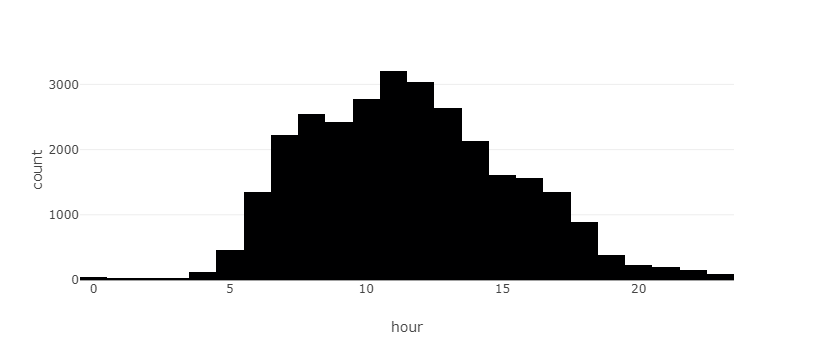

In [63]:
fig = px.histogram(df, x="hour")
fig.show()

In [81]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).weekday
# Naming the weekdays
weekdays = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
# Applying the naming
df["weekday"] = df['day'].map(weekdays)
# Doing the same for months
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dec'}
df["month_name"] = df['month'].map(months)

/tmp/ipykernel_19915/3578903574.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19915/3578903574.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19915/3578903574.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1

In [82]:
df.head()

,Unnamed: 0,date,station_key,text,station name,lines,area,latitude,longitude,hour,year,month,day,weekday,month_name
0,0,2018-02-15 12:03:00,wildau,https shopdigitalcouragedelichtbildausweismit...,Wildau,S46,Wildau,52.320000,13.633889,12.0,2018.0,2.0,3.0,Thu,Feb
1,1,2018-02-15 18:44:00,erkner,kritik durchaus berechtigt sehe aba tatsache g...,Erkner,S3,Erkner,52.429722,13.751389,18.0,2018.0,2.0,3.0,Thu,Feb
2,2,2018-02-16 07:39:00,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,7.0,2018.0,2.0,4.0,Fri,Feb
3,3,2018-02-16 12:12:00,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,12.0,2018.0,2.0,4.0,Fri,Feb
4,4,2018-02-16 14:31:00,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,14.0,2018.0,2.0,4.0,Fri,Feb


In [109]:
df['year'].datatyp

AttributeError: 'Series' object has no attribute 'datatype'

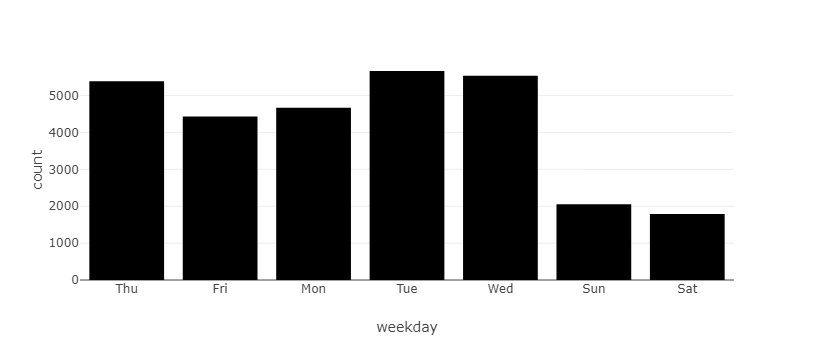

In [83]:
fig = px.histogram(df, x="weekday")
fig.show()

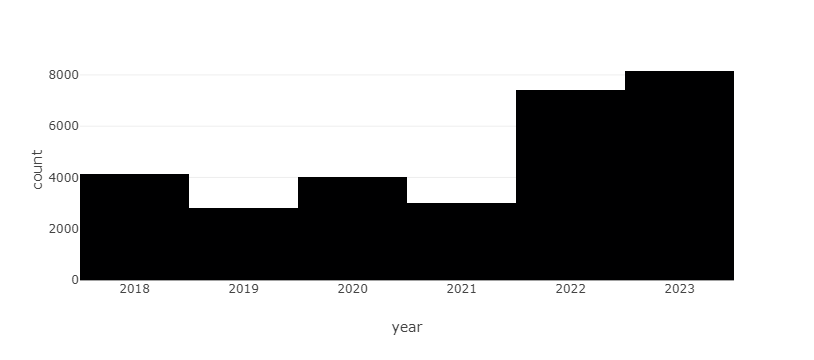

In [84]:
fig = px.histogram(df, x="year", color = "")
fig.show()

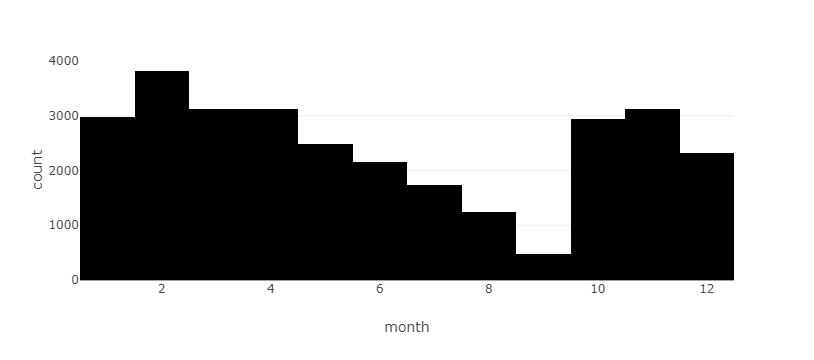

In [85]:
fig = px.histogram(df, x="month")
fig.show()

In [105]:
# sns.histplot(data = df
#             ,x = 'month'
#             ,color = 'indianred'
#             ,alpha = 1
#             ,hue='month'
#             ,binwidth=1
#             ,palette='rocket'
#             ,kde=False);

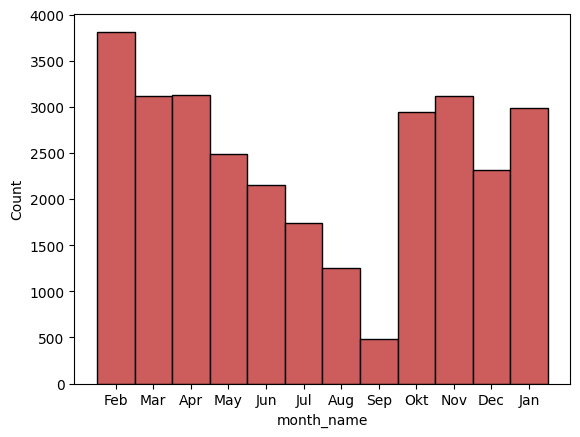

In [87]:
sns.histplot(data = df
            ,x = 'month_name'
            ,color = 'indianred'
            ,alpha = 1
            ,binwidth=1
            ,kde=False);

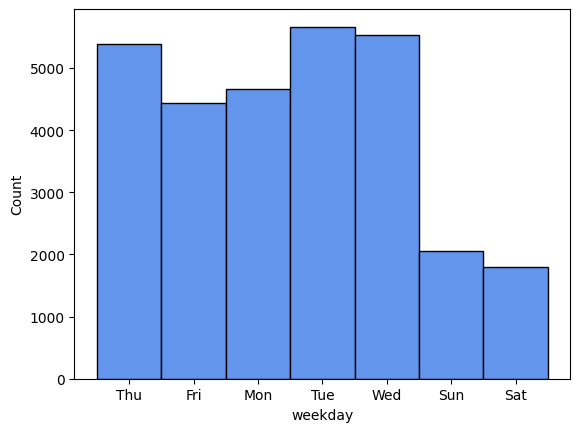

In [88]:
sns.histplot(data = df
            ,x = 'weekday'
            ,color = 'indianred'
            ,alpha = 1
            ,kde=False);

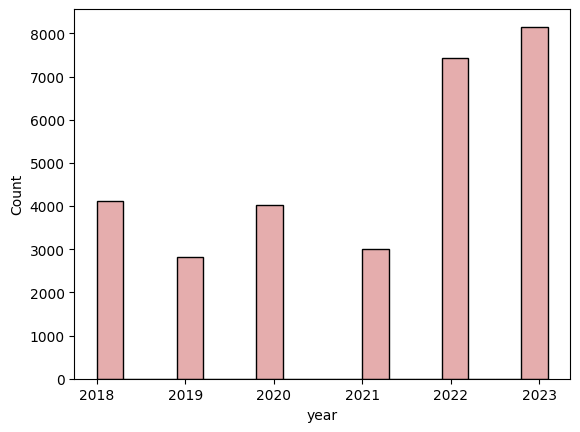

In [99]:
sns.histplot(data = df
            ,x = 'year'
            ,color = 'indianred'
            ,alpha = 0.5
            ,binwidth = 0.3
            ,kde=False);

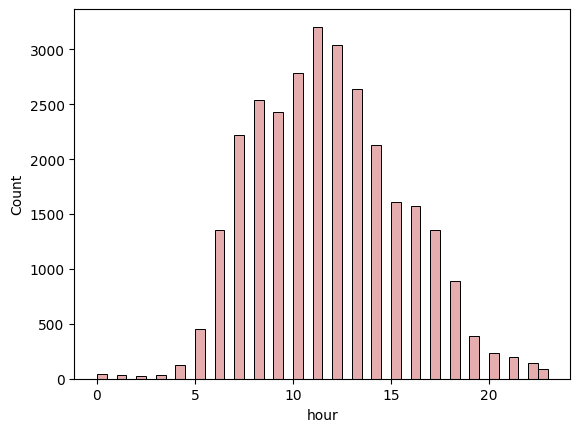

In [104]:
sns.histplot(data = df
            ,x = 'hour'
            ,color = 'indianred'
            ,alpha = 0.5
            ,binwidth = 0.5
            ,kde=False);